In [1]:
import matplotlib.pyplot as plt

plt.style.use("./auri.mplstyle")


In [2]:
import pandas as pd

df = pd.read_csv(
    "data/data.csv",
    dtype={
        "X": "float",
        "Y": "float",
        "A8": "str",
        "A10": "str",
        "A13": "str",
        "A14": "float",
        "A18": "float",
        "A19": "str",
        "A20": "str",
        "NEAR_DIST": "float",
        "fire_1km_c": "float",
        "fire_1km2_": "float",
        "fire_500m_": "float",
        "gd_zone": "float",
        "gg_zone": "float",
        "jd_zone": "float",
        "pr_zone": "float",
        "si_zone": "float",
        "crime_zone": "float",
    },
)

print(len(df))

df = df[(df.A19.notna()) & (df.fire_1km_c >= 0)].copy()

print(len(df))


669143
540111


In [3]:
df.NEAR_DIST.describe()

count    540111.000000
mean         62.333671
std          53.523927
min           0.006973
25%          32.009243
50%          52.637526
75%          79.751263
max        1992.152556
Name: NEAR_DIST, dtype: float64

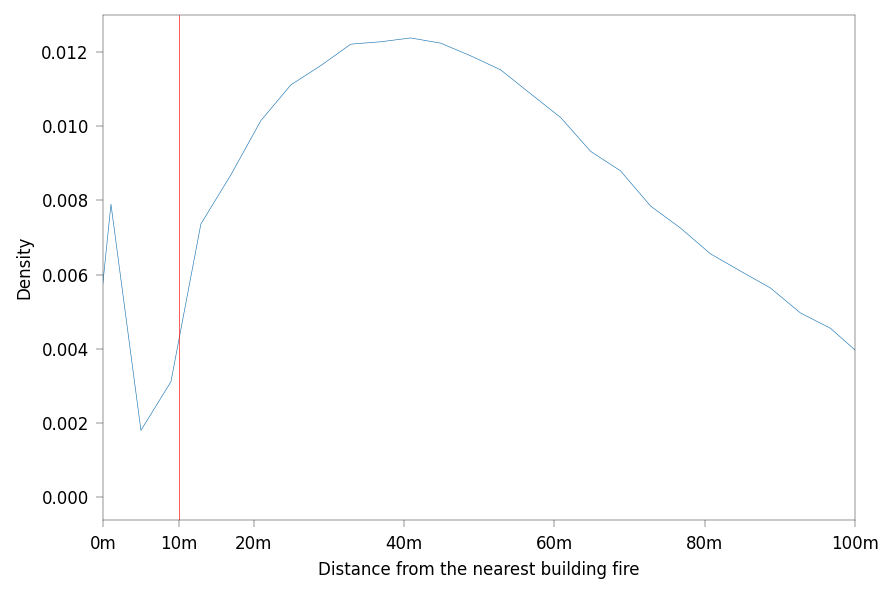

In [10]:
# Scott’s Rule [1], implemented as scotts_factor, is:
# n**(-1./(d+4)),
# with n the number of data points and d the number of dimensions.

df.NEAR_DIST.plot.kde(xlim=(0, 100), bw_method=540000 ** (-1.0 / (1 + 4)) * 0.1)
plt.axvline(10, color="r")

ticks = sorted(list(range(0, 100 + 1, 20)) + [10])
ticklabels = [f"{t}m" for t in ticks]
plt.xticks(ticks, ticklabels)

plt.xlabel("Distance from the nearest building fire")
plt.tight_layout()

plt.savefig("output/distance.svg")
plt.savefig("output/distance.png")


In [170]:
df[df.NEAR_DIST <= 10].describe()


,X,Y,A14,A18,NEAR_DIST,fire_1km_c,fire_1km2_,fire_500m_,gd_zone,gg_zone,jd_zone,pr_zone,si_zone,crime_zone
count,20480.000000,2.048000e+04,20480.000000,20480.000000,20480.000000,20480.000000,20480.000000,20480.000000,20480.000000,20480.000000,20480.000000,20480.000000,20480.000000,20480.000000
mean,955120.122171,1.950251e+06,2294.740748,158.552973,3.848133,61.902102,72.422754,74.814016,0.000006,0.000166,0.001321,0.001809,0.000004,0.003305
std,7231.430286,5.597636e+03,8451.576355,2643.367513,2.983981,24.446242,31.974821,33.939845,0.000019,0.000396,0.002104,0.002787,0.000016,0.005074
min,938151.233899,1.937449e+06,0.000000,0.000000,0.006973,0.954930,1.000000,1.273240,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,949079.997275,1.945509e+06,192.230000,0.000000,1.491960,44.881700,49.750000,50.929600,0.000000,0.000000,0.000424,0.000594,0.000000,0.001142
50%,956353.623132,1.950127e+06,412.490000,110.780000,2.661517,58.569000,68.000000,71.301400,0.000000,0.000067,0.000800,0.001069,0.000000,0.001968
75%,960496.872934,1.953832e+06,995.992500,199.090000,6.189198,78.304200,91.000000,94.219700,0.000000,0.000156,0.001405,0.001942,0.000000,0.003469
max,971818.464127,1.965825e+06,258427.500000,218118.000000,9.999817,135.600000,182.000000,208.811000,0.000336,0.004905,0.031689,0.032413,0.000272,0.062871


In [200]:
df.loc[df.NEAR_DIST <= 10, "fire"] = 1
df.loc[df.NEAR_DIST > 10, "fire"] = 0
df.fire = df.fire.astype(int)

df["fire_1km_cnt"] = df.fire_1km_c.apply(lambda x: int(round(x / 0.31831)))
df["fire_1km2_cnt"] = df.fire_1km2_.apply(lambda x: int(round(x)))
df["fire_500m_cnt"] = df.fire_500m_.apply(lambda x: int(round(x / 1.27324)))

fires = ["fire_1km_cnt", "fire_1km2_cnt", "fire_500m_cnt"]
df.loc[df.fire == 1, fires] = df.loc[df.fire == 1, fires] - 1
display(df[df.fire == 1].head())

crimes = ["gd_zone", "gg_zone", "jd_zone", "pr_zone", "si_zone", "crime_zone"]
df[crimes] = df[crimes].clip(lower=0)
display(df[df.gd_zone <0].head())

df.head()


,X,Y,A8,A10,A13,A14,A18,A19,A20,NEAR_DIST,...,gg_zone,jd_zone,pr_zone,si_zone,crime_zone,fire,fire_1km_cnt,fire_1km2_cnt,fire_500m_cnt,year
85,959772.830846,1.965825e+06,22000,21,2001-08-22,11718.52,0.71,14252,N,3.573905,...,0.000005,0.000083,0.000102,0.0,0.00019,1,40,19,16,2001
139,959552.861182,1.965739e+06,01000,NaN,NaN,0.00,0.00,900001508,N,8.871141,...,0.000005,0.000083,0.000102,0.0,0.00019,1,41,16,16,<NA>
140,959554.205997,1.965732e+06,01000,NaN,NaN,0.00,0.00,900001487,N,1.870639,...,0.000005,0.000083,0.000102,0.0,0.00019,1,41,16,16,<NA>
141,959560.465289,1.965731e+06,01000,NaN,NaN,0.00,0.00,900001500,N,7.004203,...,0.000005,0.000083,0.000102,0.0,0.00019,1,41,17,16,<NA>
236,959583.486455,1.965617e+06,01000,NaN,NaN,0.00,0.00,900001503,N,1.099034,...,0.000005,0.000083,0.000102,0.0,0.00019,1,50,22,18,<NA>


,X,Y,A8,A10,A13,A14,A18,A19,A20,NEAR_DIST,...,gg_zone,jd_zone,pr_zone,si_zone,crime_zone,fire,fire_1km_cnt,fire_1km2_cnt,fire_500m_cnt,year


,X,Y,A8,A10,A13,A14,A18,A19,A20,NEAR_DIST,...,gg_zone,jd_zone,pr_zone,si_zone,crime_zone,fire,fire_1km_cnt,fire_1km2_cnt,fire_500m_cnt,year
37,959850.802938,1.965981e+06,19000,31,2013-11-11,478.256,0.00,100196744,N,175.894733,...,4.839540e-06,0.000083,0.000102,0.000000e+00,0.000190,0,36,14,12,2013
39,959820.766646,1.965963e+06,19000,31,2013-11-11,135.880,0.00,100196745,N,147.860441,...,4.839540e-06,0.000083,0.000102,0.000000e+00,0.000190,0,36,15,12,2013
42,958669.866323,1.965951e+06,01000,51,1953-03-10,149.420,0.00,16993,N,818.529556,...,1.466000e-07,0.000001,0.000002,2.000000e-11,0.000004,0,6,0,0,1953
48,959861.057922,1.965921e+06,03000,21,2016-10-21,231.520,72.58,100207771,N,131.033976,...,4.839540e-06,0.000083,0.000102,0.000000e+00,0.000190,0,38,16,14,2016
57,959931.949212,1.965876e+06,22000,32,1995-05-15,434.060,0.00,14253,N,166.217673,...,7.930970e-05,0.000257,0.000225,0.000000e+00,0.000562,0,43,17,16,1995


In [201]:
df.A13[df.A13.notna() & ~df.A13.str[:2].isin(["19","20"])].count()

33

In [202]:
idx_year = df[(df.A13.str.len() >=4)& df.A13.str[:2].isin(["19","20"])].index

df.loc[idx_year, "year"] = df.loc[idx_year, "A13"].str[:4]
df.year = df.year.astype("Int64")
df.year.value_counts()

1993    27983
1991    27497
1990    22579
1992    22100
1994    20451
        ...  
1903        3
1914        2
1911        2
1900        1
1919        1
Name: year, Length: 116, dtype: Int64

In [203]:
import numpy as np
with np.printoptions(precision=None, suppress=True):
    print(df.loc[368, "fire_1km_c"])

0.31831


In [204]:
with np.printoptions(precision=None, suppress=True):
    print(df.loc[469, "fire_500m_"])

1.27324


In [205]:
df.fire_1km_cnt.value_counts().sort_index()

0      147
1      179
2       85
3      255
4      140
      ... 
426      6
427      5
428      1
429      2
430      1
Name: fire_1km_cnt, Length: 431, dtype: int64

In [206]:
df.fire_1km2_cnt.value_counts().sort_index()

0      604
1      540
2      804
3      699
4      909
      ... 
179     13
180      5
181      2
182      1
183      1
Name: fire_1km2_cnt, Length: 184, dtype: int64

In [207]:
df.fire_500m_cnt.value_counts().sort_index()

0       798
1       716
2      1131
3       927
4      1281
       ... 
159       3
160       1
161       1
162       1
163       1
Name: fire_500m_cnt, Length: 164, dtype: int64

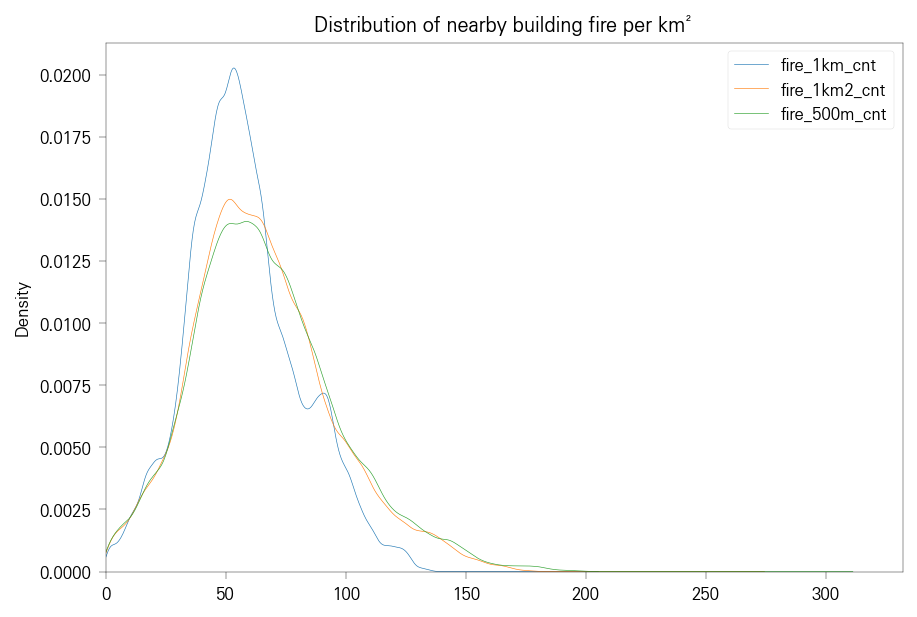

In [208]:
from math import pi

for col, area in zip(
    ["fire_1km_cnt", "fire_1km2_cnt", "fire_500m_cnt"],
    [pi, 1, pi * (0.5**2)],
):
    (df[col] / area).plot.kde()

plt.title("Distribution of nearby building fire per km²")
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.legend()


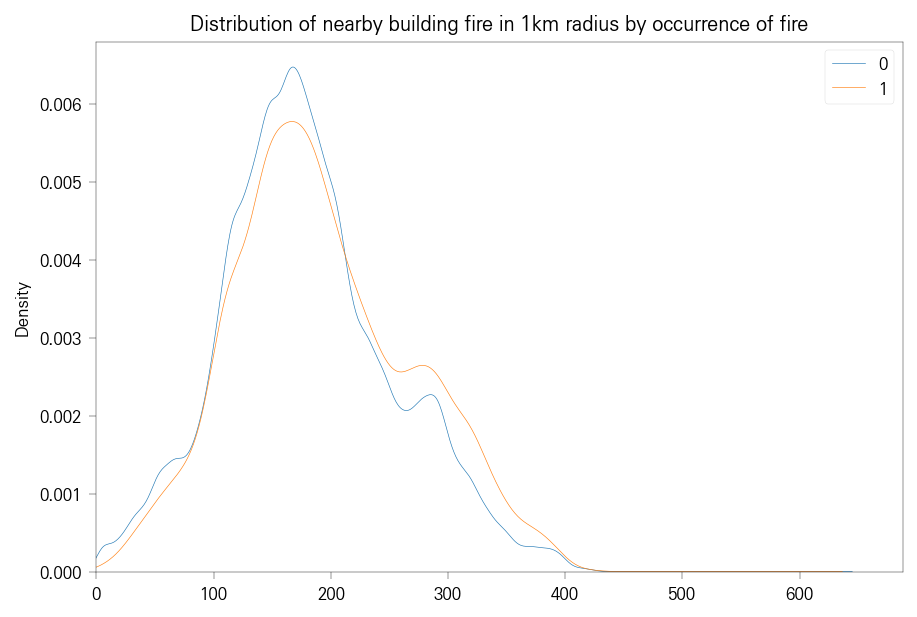

In [209]:
for i in range(2):
    (df.loc[df.fire == i, "fire_1km_cnt"]).plot.kde(label=i)

plt.title("Distribution of nearby building fire in 1km radius by occurrence of fire")
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.legend()

In [210]:
from pathlib import Path


out = Path('output/data.parquet')
out.parent.mkdir(exist_ok=True)
df.to_parquet(out)